# One File readed

In [4]:
import cv2
import os
import numpy as np

#------ briey : coordinates of patron
#start_x = 770
#start_y = 300
#stop_x = 770
#stop_y = 680
#------------
start_x = 770  #width = 37
start_y = 299
stop_x = 770
stop_y = 672



#image size
imgSizeX =17002
imgSizeY= 1000

#Debug
PRINTIMG = False
#Load start image
start_image =  cv2.imread('images/patron_detection/noSnow.jpeg') 

#Turn it to grayscale
gray_image = cv2.resize(cv2.cvtColor(start_image, cv2.COLOR_BGR2GRAY), (imgSizeX,imgSizeY), interpolation = cv2.INTER_AREA)

#analyse zone width
lineWidth = 12
#crop the image
crop_image = gray_image[start_y:stop_y, start_x-round(lineWidth/2):start_x+round(lineWidth/2)]

#variable use if i have to increase the contrast
contrast_up_image = crop_image

#Make an adaptive threshold
thresh1 = cv2.adaptiveThreshold(contrast_up_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,51,11) #51,21


#pass the image into sobelx 
sobelx = cv2.Sobel(thresh1,cv2.CV_64F,0,1,ksize=5)




sizeX = sobelx.shape[0]
sizeY = sobelx.shape[1]
#print(sizeX)
#print(sizeY)

if PRINTIMG == True:
    cv2.imshow("cropped", crop_image)
    cv2.imshow("thresholded",thresh1)
    cv2.imshow("sobel",sobelx)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


sumPixel = []
for i in range(0,sizeY):
    countPixel = 0
    for j in range(1,sizeX):
        if sobelx[sizeX-j][i] == 0.0 :
            countPixel = countPixel + 1
        else:
            sumPixel.append(countPixel)
            break
snow_height_pixel = np.median(sumPixel)
print("Mediane de la hauteur [pixel] :"+str(snow_height_pixel))

reference_Height_mm = 1000


conversion_rapport = reference_Height_mm/sizeX
snow_height_mm = np.round(conversion_rapport * snow_height_pixel,1)
print("snow height pixel :" + str(snow_height_pixel))
print("rapport : " + str(np.round(conversion_rapport,1)) + "mm/pixel")
print("snow height mm " + str(snow_height_mm))

Mediane de la hauteur [pixel] :1.0
snow height pixel :1.0
rapport : 2.7mm/pixel
snow height mm 2.7


# All images from folder tested 

In [43]:
import cv2
import os
import numpy as np
import glob

#------ briey : coordinates of patron
start_x = 770
start_y = 300
stop_x = 770
stop_y = 685
#------------
reference_Height_mm = 1000

#image size
imgSizeX =1700
imgSizeY= 1000

#Debug
PRINTIMG = False
#Load start image
images = [cv2.imread(file) for file in glob.glob("images/patron_detection/*.jpeg") ]
file_name = []

for fileName_relative in glob.glob("images/patron_detection/*.jpeg",recursive=True):       ## first get full file name with directores using for loop
    fileName_absolute = os.path.basename(fileName_relative)                 ## Now get the file name with os.path.basename
   #print(fileName_absolute.split('.')[0])
    name = fileName_absolute.split('.')[0].replace("_",".")
    file_name.append(name)

resultReal = []
resultAlgo = []
resultError =[]
#--------------------------------------------------------START ALGO---------------------------------------------
mean_error = 0
for idx_file_name, start_image in enumerate(images):
    gray_image = cv2.resize(cv2.cvtColor(start_image, cv2.COLOR_BGR2GRAY), (imgSizeX,imgSizeY), interpolation = cv2.INTER_AREA)

    #analyse zone width
    lineWidth = 12
    #crop the image
    crop_image = gray_image[start_y:stop_y, start_x-round(lineWidth/2):start_x+round(lineWidth/2)]

    #variable use if i have to increase the contrast
    contrast_up_image = crop_image

    #Make an adaptive threshold
    thresh1 = cv2.adaptiveThreshold(contrast_up_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,51,11) #51,21


    #pass the image into sobelx 
    sobelx = cv2.Sobel(thresh1,cv2.CV_64F,0,1,ksize=5)


    sizeX = sobelx.shape[0]
    sizeY = sobelx.shape[1]
    #---------------------------------------------Debug---------------------------------------------------------
    if PRINTIMG == True:
        cv2.imshow("cropped", crop_image)
        cv2.imshow("thresholded",thresh1)
        cv2.imshow("sobel",sobelx)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    #------------------------------------------------------------------------------------------------------------

    sumPixel = []
    for i in range(0,sizeY):
        countPixel = 0
        for j in range(1,sizeX):
            if sobelx[sizeX-j][i] == 0.0 :
                countPixel = countPixel + 1
            else:
                sumPixel.append(countPixel)
                break
    snow_height_pixel = np.median(sumPixel)


    conversion_rapport = reference_Height_mm/sizeX
    snow_height_cm = np.round((conversion_rapport * snow_height_pixel)/10,1)

    
    if "noSnow" not in file_name[idx_file_name].split('-')[0]:
        realMeasure = float(file_name[idx_file_name].split('-')[0])
        error = round(realMeasure - snow_height_cm,1)
        error_percent = abs(round((error/snow_height_cm)*100,1))
        mean_error = mean_error + error_percent
        #print("file name : " + file_name[idx_file_name])
        #print("realMeasure : " + str(realMeasure))
        #print("snow height cm : " + str(snow_height_cm))
        #print("error : " + str(error) +"cm")
        #print("error : " +str(error_percent)+"%")
        #print()
    else: 
        realMeasure = 0
        error = 0
        error_percent = 0
        mean_error = mean_error + error_percent
        #print("file name : " + file_name[idx_file_name])
        #print("realMeasure : " + str(realMeasure))
        #print("snow height cm :" + str(snow_height_cm))
        #print("error : " + str(error) +"cm")
        #print("error : " +str(error_percent)+"%")
        #print()
    resultReal.append(realMeasure)
    resultAlgo.append(snow_height_cm)
    resultError.append(error_percent)

mean_error = round(mean_error / len(images),1)    
print ("\n\n Erreur moyenne : " + str(mean_error) + "%" )



 Erreur moyenne : 5.4%


# Chart of results

In [44]:
print(resultReal)
print(resultAlgo)
print(resultError)

[17.0, 27.0, 21.0, 11.0, 28.0, 35.0, 0, 10.0, 14.5, 0, 38.0, 5.0]
[17.1, 25.7, 20.9, 11.0, 27.3, 33.2, 3.6, 11.3, 15.1, 3.1, 37.1, 7.5]
[0.6, 5.1, 0.5, 0.0, 2.6, 5.4, 0, 11.5, 4.0, 0, 2.4, 33.3]


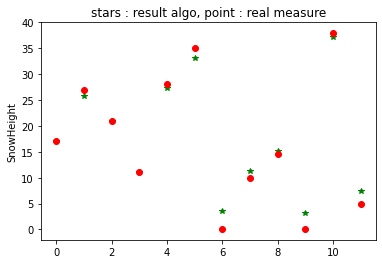

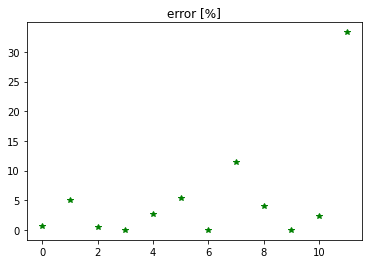

In [45]:
from matplotlib import pyplot as plt 


plt.plot(resultAlgo,'g*', resultReal, 'ro')
plt.ylim(-2,40)
plt.ylabel("SnowHeight")
plt.title("stars : result algo, point : real measure")
plt.show()

plt.plot(resultError,'g*')
plt.title("error [%]")
plt.show()